In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn import tree
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_pickle("./TempData/preprocessed")
df.head()

,Unnamed: 0,text,label,tweet_length,tidy_tweet,tidy_tweet_tokens,tokens_no_stop
0,0,These girls are the equivalent of the irritati...,racism,99,these girls equivalent irritating asian girls ...,"[these, girl, equivalent, irritate, asian, gir...","[girl, equivalent, irritate, asian, girl, coup..."
1,2,"Colin will save them. They're pretty blondes, ...",sexism,75,colin will save them they pretty blondes they ...,"[will, save, pretty, blonde, keep, tell]","[save, pretty, blonde, keep, tell]"
2,9,Stop saying dumb blondes with pretty faces as ...,sexism,94,stop saying dumb blondes with pretty faces nee...,"[stop, say, dumb, blonde, with, pretty, face, ...","[stop, say, dumb, blonde, pretty, face, need, ..."
3,10,Obviously natural blondes!! #mkr,sexism,32,obviously natural blondes,"[obviously, natural, blonde]","[obviously, natural, blonde]"
4,11,R u fucking kidding - catwalk - all that's mis...,sexism,65,fucking kidding catwalk that missing pole,"[fuck, kid, catwalk, that, miss, pole]","[fuck, kid, catwalk, miss, pole]"


In [3]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
X = vectorizer.fit_transform(df['tokens_no_stop'].values)


In [4]:
y = np.zeros((len(df['text'])))
for idx, row in df.iterrows():
    if row['label'] not in ['none' ,'normal','NOT']:
        y[idx] = 1

In [5]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=10)
clf = clf.fit(X, y)

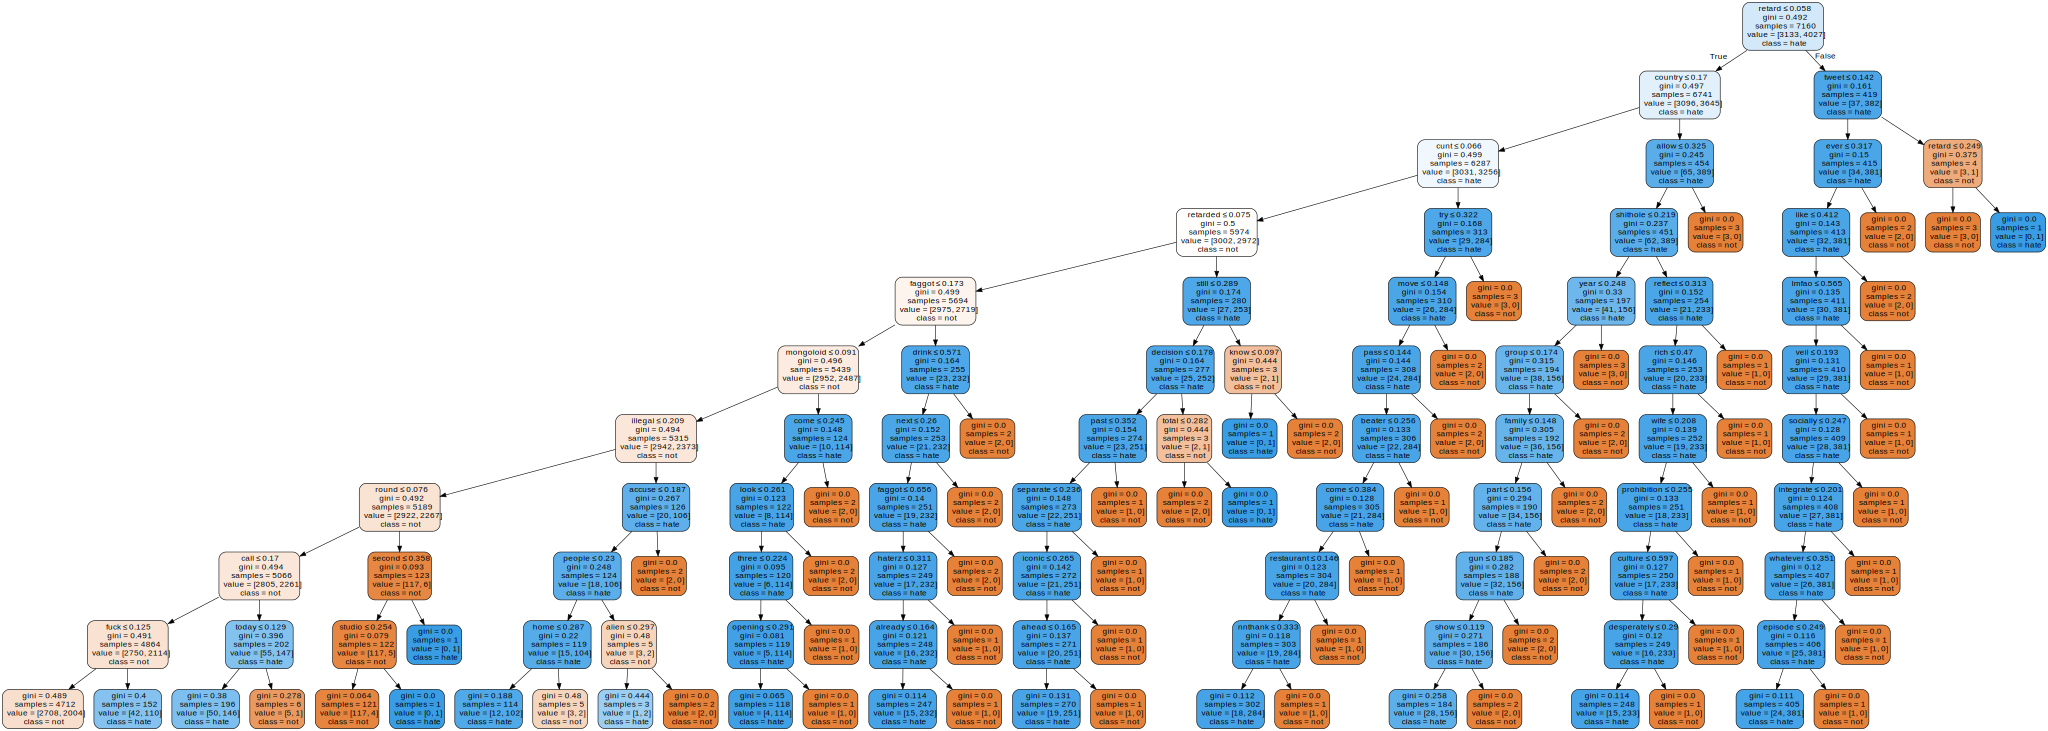

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names=['not','hate'],
    feature_names=vectorizer.get_feature_names(),
    filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("./twitter_data/tree_tfidf") 

display(graphviz.Source(dot_data))

## Feature importance
_feature_importances_ attribute on the model can be used to get most important features. It gives the value for each feature, more the value more the importance. The top 20 important features are shown below.

In [9]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(vectorizer.get_feature_names(), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print(feature_importances)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: retard               Importance: 0.1334303926
Variable: faggot               Importance: 0.125113148
Variable: cunt                 Importance: 0.1211211967
Variable: country              Importance: 0.1179208033
Variable: retarded             Importance: 0.1174407377
Variable: mongoloid            Importance: 0.0656897169
Variable: illegal              Importance: 0.0487667687
Variable: round                Importance: 0.0460052543
Variable: call                 Importance: 0.0403923739
Variable: fuck                 Importance: 0.0317833906
Variable: come                 Importance: 0.0062741304
Variable: try                  Importance: 0.0060455629
Variable: allow                Importance: 0.0053749312
Variable: today                Importance: 0.0047189348
Variable: year                 Importance: 0.0046311339
Variable: look                 Importance: 0.004304111
Variable: tweet                Importance: 0.004286727
Variable: shithole             Importance: 0.004232